# Gyroscope DDPG reward function testing (spinup library)

In [ ]:
# More tests in reward_testing.py

In [2]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

from Gyro_Envs import GyroscopeEnvV1
import spinup
import torch
from functools import partial


import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Plot rewards

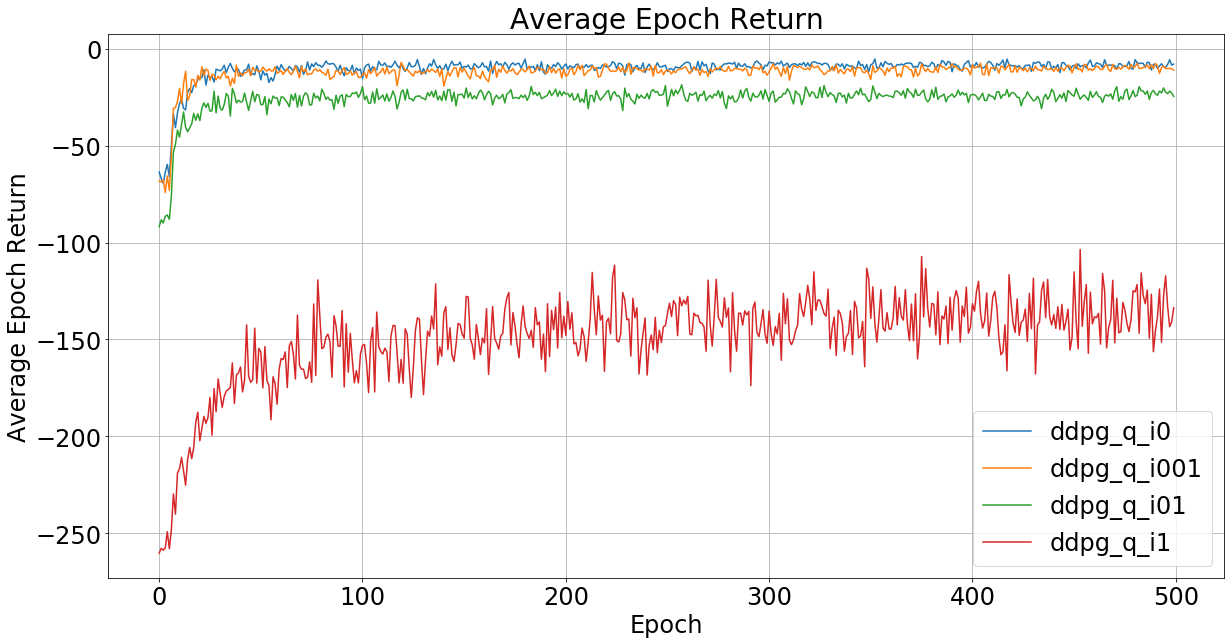

In [3]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['ddpg_q_i0','ddpg_q_i001','ddpg_q_i01','ddpg_q_i1']

for agent_path in agent_paths:
    progress = read_progress(agent_path)
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

# plt.xlim([0,500])
# plt.ylim([-2000,0])
plt.legend(agent_paths,fontsize=24)

## Test an agent

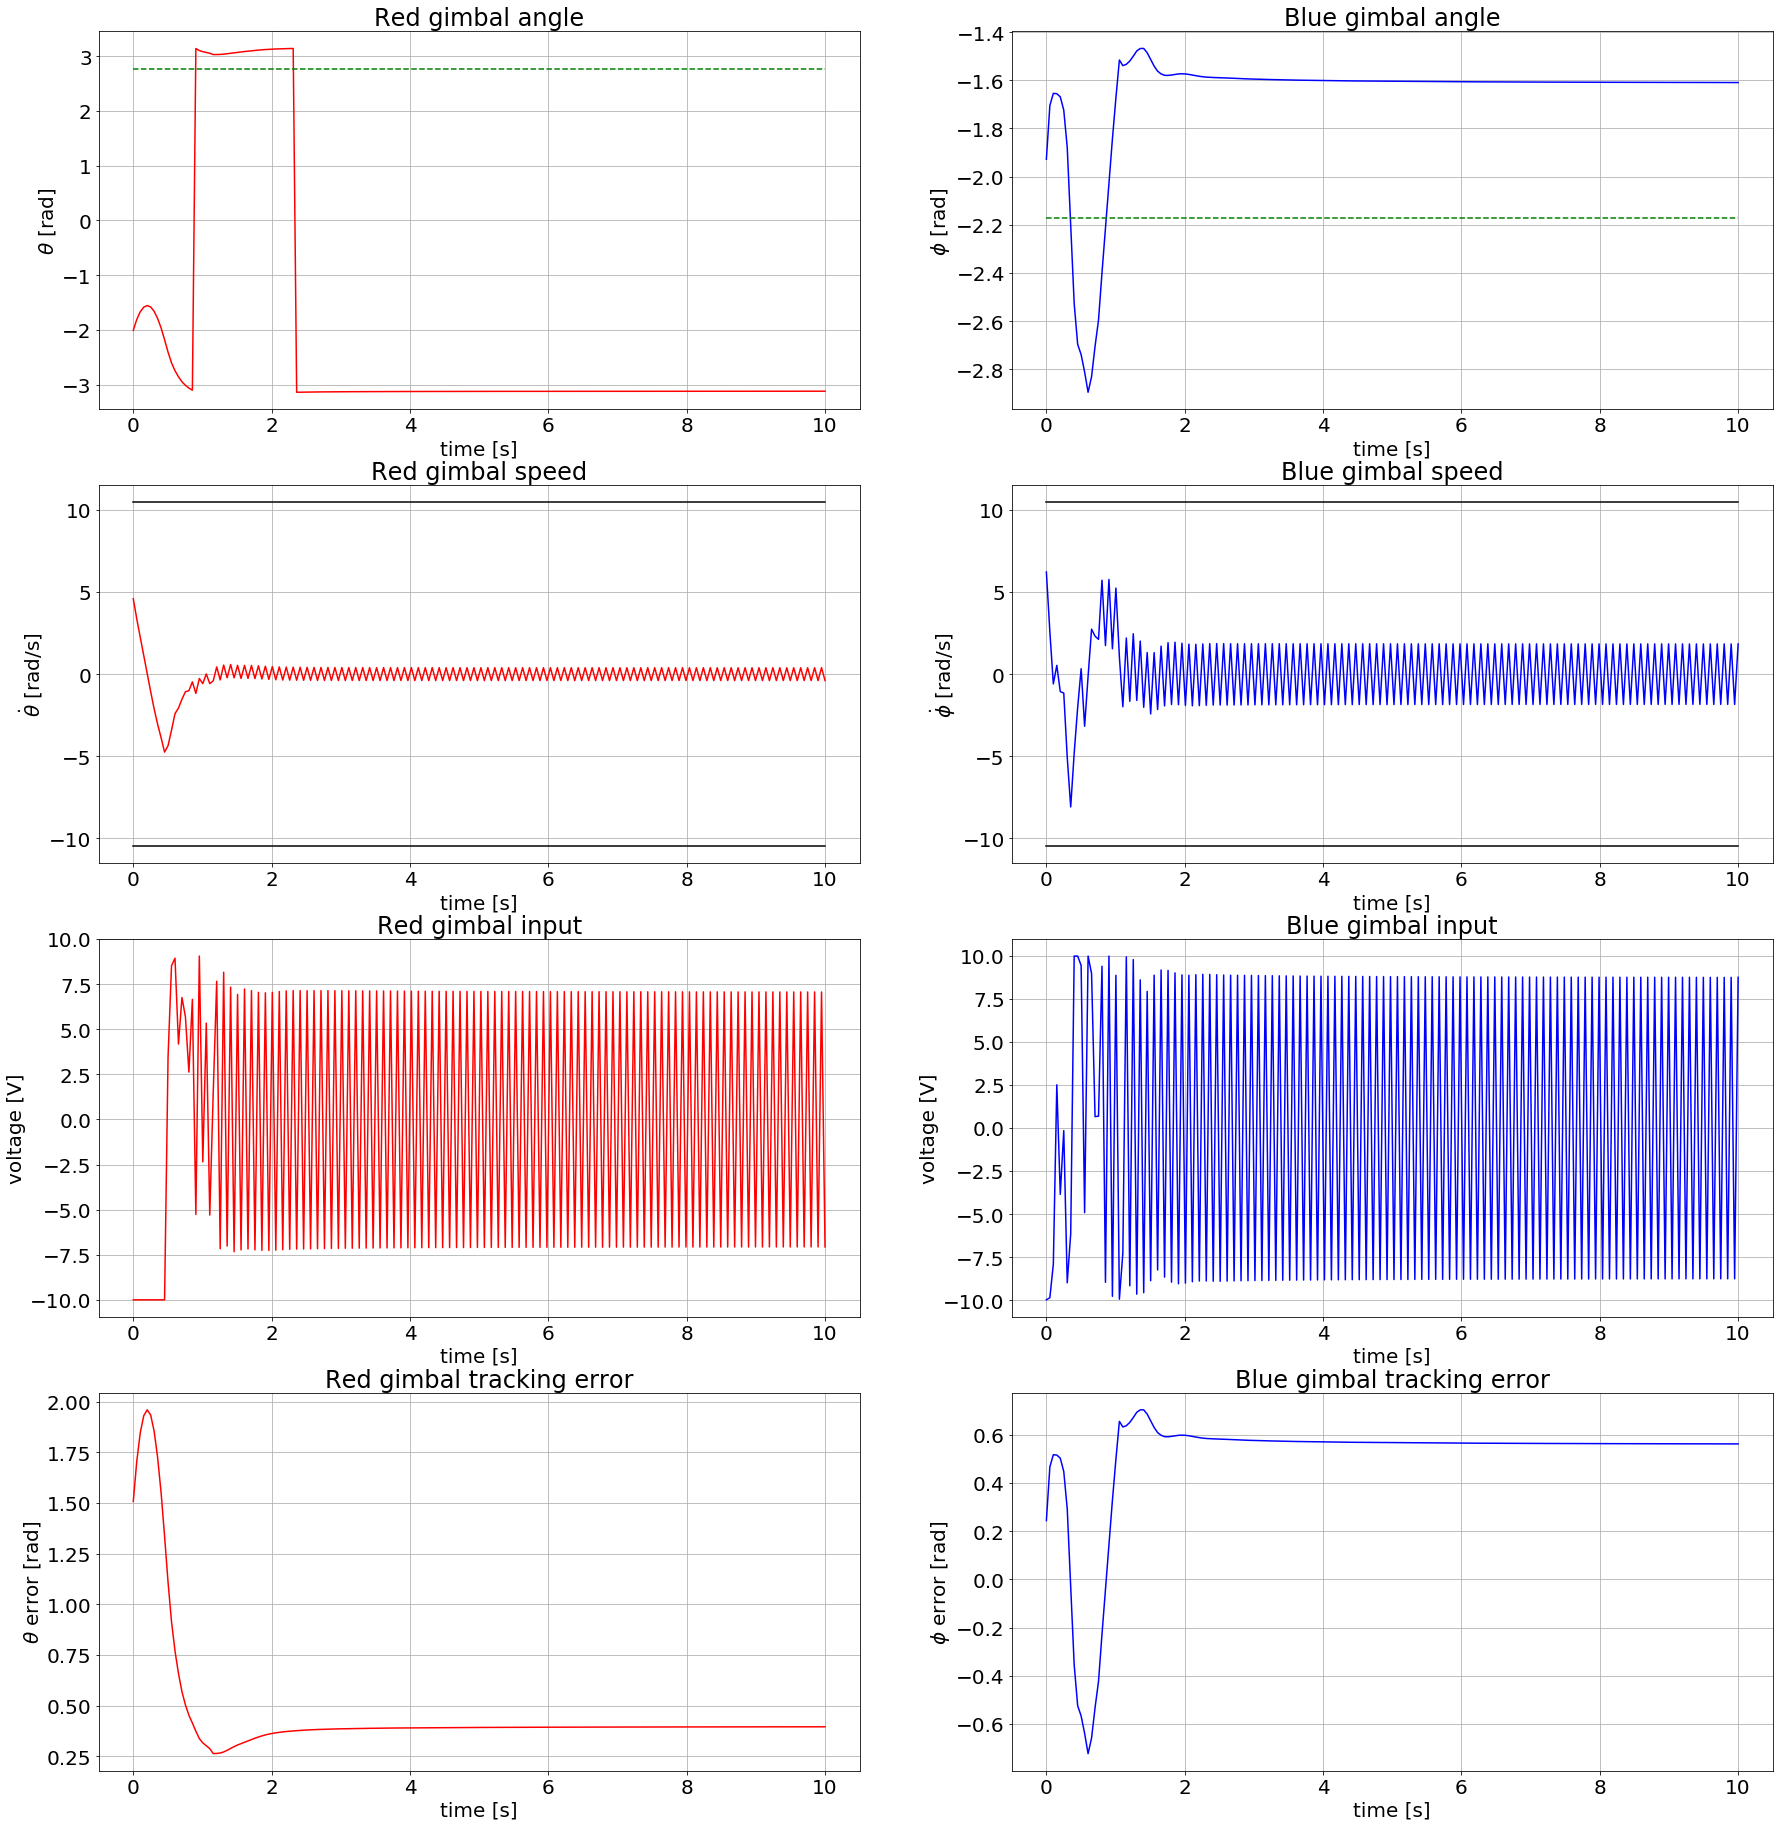

In [4]:
# Test paramaters
env_name = 'GyroscopeIntegralEnv-v1'

# init_state = np.array([0,0,0,0,45/180*np.pi,-60/180*np.pi,200/60*2*np.pi])
env = create_env(env_name,state=None)

agent_paths = ['ddpg_q_i0','ddpg_q_i001','ddpg_q_i01','ddpg_q_i1']

agent = load_agent(agent_paths[0])
t_end = 10

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

## Evaluate control performance

In [5]:
metrics_QI = pd.read_csv('Metrics_QI.csv')
metrics_QI
# print(metrics_QI.to_latex(escape=False,index=False))

Unnamed: 0  ddpg_q_i0  ddpg_q_i001  ddpg_q_i01  ddpg_q_i1
0           $\theta$ MAE (rad)     0.4179       0.4627      0.3627     0.5716
1             $\phi$ MAE (rad)     0.3596       0.4099      0.3052     0.2382
2          $\theta$ MSSE (rad)     0.3598       0.4212      0.2697     0.4298
3            $\phi$ MSSE (rad)     0.3362       0.3856      0.2192     0.0809
4       $\theta$ in bounds (%)    34.6600      37.5600     44.3300    36.1200
5         $\phi$ in bounds (%)    26.7600      33.6500     37.7200    54.2100
6        $\theta$ unsteady (%)    26.0200       4.0600     25.7500    32.2200
7          $\phi$ unsteady (%)    40.4600       6.0900     42.8600    39.7200
8       $\theta$ rise time (s)     0.6550       0.6887      0.6523     0.6482
9         $\phi$ rise time (s)     0.4678       0.4426      0.4182     0.3271
10  $\theta$ settling time (s)     1.6191       2.2897      2.3020     2.8427
11    $\phi$ settling time (s)     1.5416       1.8420      1.9561     1.9187
12                      u1 (V)     5.5494       9.6332      6.7638     7.3586
13                      u2 (V)     4.9141       8.2619      5.3195     5.5397
14            u1 variation (V)     8.8295      18.1618     11.6915    12.2512
15            u2 variation (V)     8.2352      15.7458      9.2944     9.3574
16      Convergence time (min)     0.0000       0.0000      0.0000     0.0000